In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# игнорировать предупреждения
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('tendency_to_obesity.csv', converters = {
    'Age': lambda x: int(float(x)),
    'Height': lambda x: int(float(x) * 100),
    'Weight': lambda x: int(float(x)),
    'FCVC': lambda x: int(float(x)),
    'NCP': lambda x: int(float(x)),
    'CH2O': lambda x: int(float(x)),
    'FAF': lambda x: int(float(x)),
    'TUE': lambda x: int(float(x))
})
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,162,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,152,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,180,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,180,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,178,89,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,171,131,yes,yes,3,3,Sometimes,no,1,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,174,133,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,175,133,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,173,133,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
data.replace({ 
    'yes': 1, 
    'no': 0, 
    'Male': 1, 
    'Female': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3,
    'Automobile': 0,
    'Public_Transportation': 2,
    'Motorbike': 4,
    'Bike': 20,
    'Walking': 40
}, inplace=True)

In [4]:
data['Gender'] = data['Gender'].astype('int')
data['family_history_with_overweight'] = data['family_history_with_overweight'].astype('int')
data['FAVC'] = data['FAVC'].astype('int')
data['CAEC'] = data['CAEC'].astype('int')
data['SMOKE'] = data['SMOKE'].astype('int')
data['SCC'] = data['SCC'].astype('int')
data['CALC'] = data['CALC'].astype('int')
data['MTRANS'] = data['MTRANS'].astype('int')
data['NObeyesdad'] = data['NObeyesdad'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   int32   
 1   Age                             2111 non-null   int64   
 2   Height                          2111 non-null   int64   
 3   Weight                          2111 non-null   int64   
 4   family_history_with_overweight  2111 non-null   int32   
 5   FAVC                            2111 non-null   int32   
 6   FCVC                            2111 non-null   int64   
 7   NCP                             2111 non-null   int64   
 8   CAEC                            2111 non-null   int32   
 9   SMOKE                           2111 non-null   int32   
 10  CH2O                            2111 non-null   int64   
 11  SCC                             2111 non-null   int32   
 12  FAF                 

In [5]:
#X1 = data[['Gender', 'Age', 'Height', 'Weight']]
y1 = data[['NObeyesdad']]
X1 = data.drop(['NObeyesdad'], axis=1)
#y1.replace({
#    'Overweight_Level_I': 'ow', 
#    'Overweight_Level_II': 'ow', 
#    'Obesity_Type_I': 'ow', 
#    'Obesity_Type_II': 'ow', 
#    'Obesity_Type_III': 'ow'
#}, inplace=True)

In [6]:
#sns.pairplot(pd.concat([X1, y1], axis=1), hue='NObeyesdad', diag_kind="kde", palette="colorblind");

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

## Лучшие параметры находим так:

In [11]:
gs1 = GridSearchCV(LogisticRegression(),
                    scoring='f1_weighted',
                    cv=3,
                  param_grid = {
                      'C': [0.1, 1],
                      'solver': ['newton-cg'],
                      'multi_class': ['multinomial']
                  })
gs1.fit(X1_train, y1_train)
print(classification_report(y1_test, gs1.predict(X1_test)))

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      1.00      0.98        56
      Normal_Weight       0.98      0.95      0.97        62
     Obesity_Type_I       0.99      0.99      0.99        78
    Obesity_Type_II       0.98      1.00      0.99        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.96      0.93      0.95        56
Overweight_Level_II       0.94      0.96      0.95        50

           accuracy                           0.98       423
          macro avg       0.97      0.98      0.97       423
       weighted avg       0.98      0.98      0.98       423



In [12]:
gs1.best_params_

{'C': 1, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

## Но, не понятно, почему применив StandardScaler результат ухудшается...

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
for c in X1.columns:
    X1[c] = sc.fit_transform(X1[[c]])

In [15]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [16]:
gs2 = GridSearchCV(LogisticRegression(),
                    scoring='f1_weighted',
                    cv=3,
                  param_grid = {
                      'C': [0.1, 1],
                      'solver': ['newton-cg'],
                      'multi_class': ['multinomial']
                  })
gs2.fit(X2_train, y2_train)
print(classification_report(y2_test, gs2.predict(X2_test)))

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      1.00      0.92        56
      Normal_Weight       0.91      0.66      0.77        62
     Obesity_Type_I       0.96      0.92      0.94        78
    Obesity_Type_II       0.93      0.98      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.78      0.80      0.79        56
Overweight_Level_II       0.76      0.84      0.80        50

           accuracy                           0.89       423
          macro avg       0.88      0.89      0.88       423
       weighted avg       0.89      0.89      0.89       423



## И еще не понятно, почему если добавить еще один C gridsearch найдет хуже результат, но будет считать его лучшим?

In [17]:
gs1 = GridSearchCV(LogisticRegression(),
                    scoring='f1_weighted',
                    cv=3,
                  param_grid = {
                      'C': [0.1, 1, 2],
                      'solver': ['newton-cg'],
                      'multi_class': ['multinomial']
                  })
gs1.fit(X1_train, y1_train)
print(classification_report(y1_test, gs1.predict(X1_test)))

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      1.00      0.98        56
      Normal_Weight       0.98      0.94      0.96        62
     Obesity_Type_I       0.99      0.99      0.99        78
    Obesity_Type_II       0.98      1.00      0.99        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.94      0.91      0.93        56
Overweight_Level_II       0.92      0.96      0.94        50

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



In [18]:
gs1.best_params_

{'C': 2, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

## Посмотрим, нет ли там сильно коррелирующих признаков

In [19]:
data2 = data.copy()

In [20]:
data2['NObeyesdad'] = data2['NObeyesdad'].astype('category')

In [21]:
data2['NObeyesdad'] = data2['NObeyesdad'].cat.codes

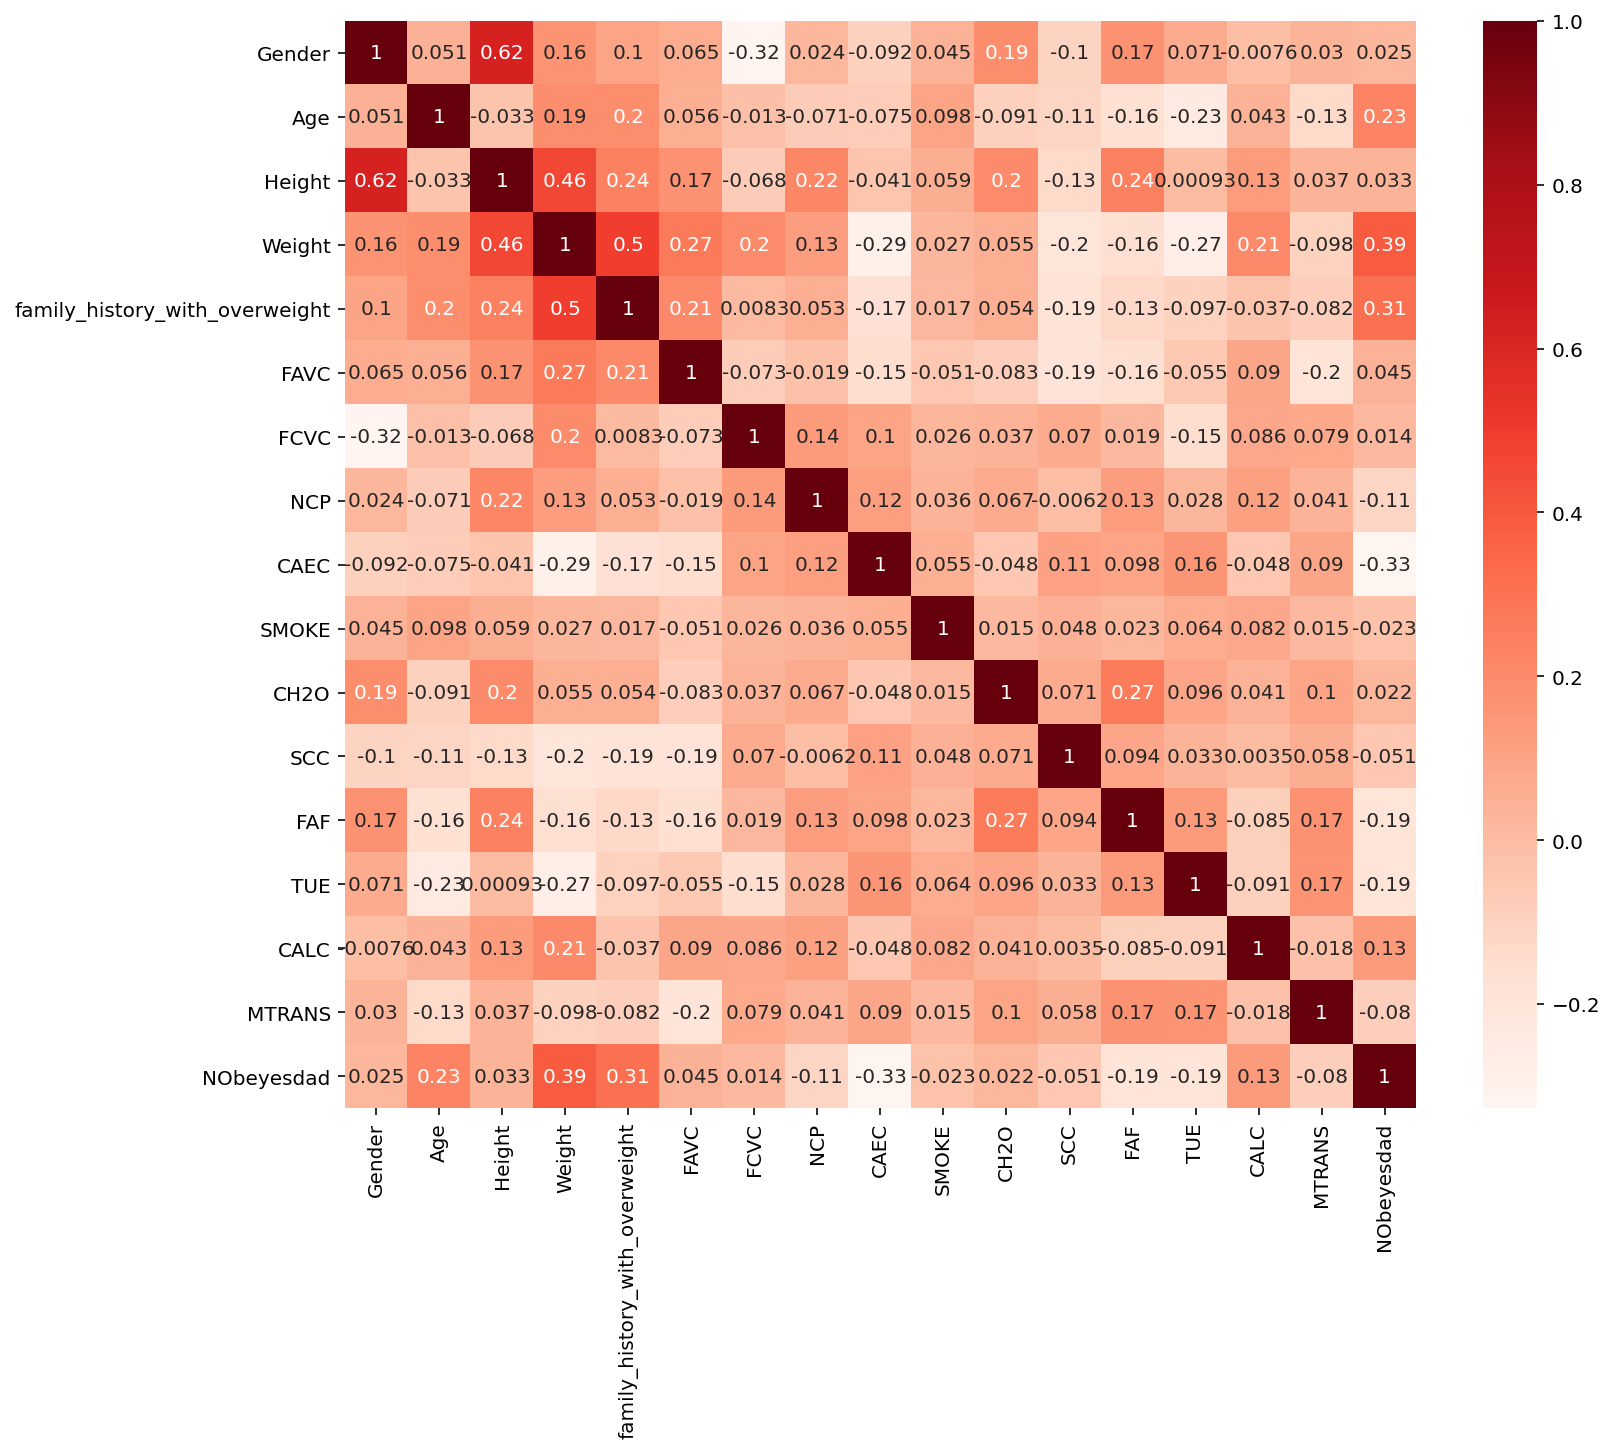

In [22]:
plt.figure(figsize=(12,10))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()